<a href="https://colab.research.google.com/github/Divyam-Deep/Linear-Regression-on-Cars-dataset/blob/main/LinearRegression_using_Sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [167]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.linear_model import LinearRegression

In [168]:
data = pd.read_csv('/content/1.04.+Real-life+example.csv')
data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


In [169]:
data.shape

(4345, 9)

In [170]:
data.isnull().sum()

,0
Brand,0
Price,172
Body,0
Mileage,0
EngineV,150
Engine Type,0
Registration,0
Year,0
Model,0


In [171]:
data = data.dropna()

In [172]:
data.isnull().sum()

,0
Brand,0
Price,0
Body,0
Mileage,0
EngineV,0
Engine Type,0
Registration,0
Year,0
Model,0


In [173]:
data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000,4025
unique,7,NaN,6,NaN,NaN,4,2,NaN,306
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN,188
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627,NaN
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000,NaN
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [174]:
data.dtypes

,0
Brand,object
Price,float64
Body,object
Mileage,int64
EngineV,float64
Engine Type,object
Registration,object
Year,int64
Model,object


In [175]:
data_no_models = data.drop('Model', axis = 1)

In [176]:
data_no_models.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011


<ipython-input-177-9e26f6daedf8>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.Price)


<Axes: xlabel='Price', ylabel='Density'>

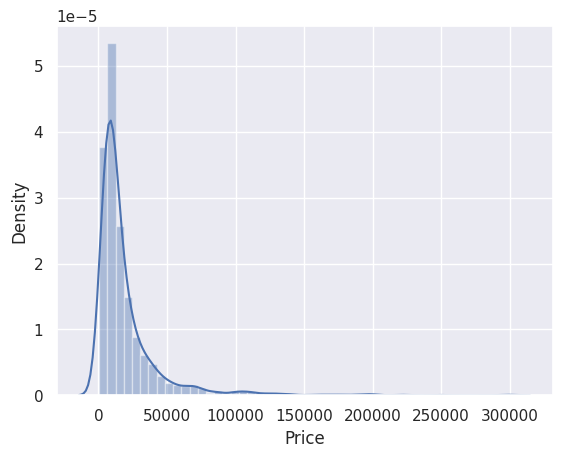

In [177]:
# price mileage engoneV

sns.distplot(data.Price)

<ipython-input-178-167203b50de0>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_no_models.Price)


<Axes: xlabel='Price', ylabel='Density'>

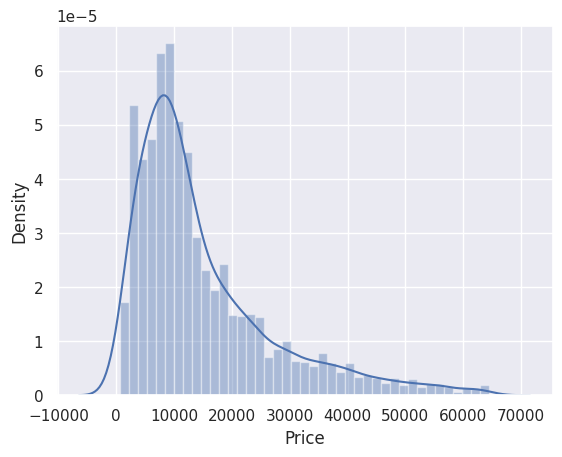

In [178]:
# remove outliars
q = data_no_models.Price.quantile(0.95)
data_no_models = data_no_models[data_no_models.Price < q]
sns.distplot(data_no_models.Price)

<ipython-input-179-c45e35266bf5>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_no_models.Mileage)


<Axes: xlabel='Mileage', ylabel='Density'>

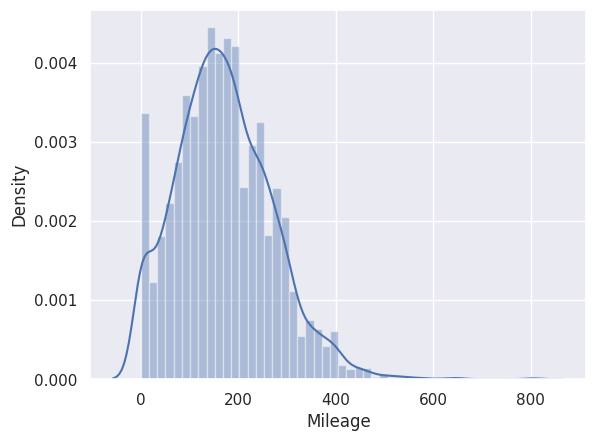

In [179]:
sns.distplot(data_no_models.Mileage)

In [180]:
data_no_models.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011


<ipython-input-181-2e9a54e0bf19>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_no_models.Mileage)


<Axes: xlabel='Mileage', ylabel='Density'>

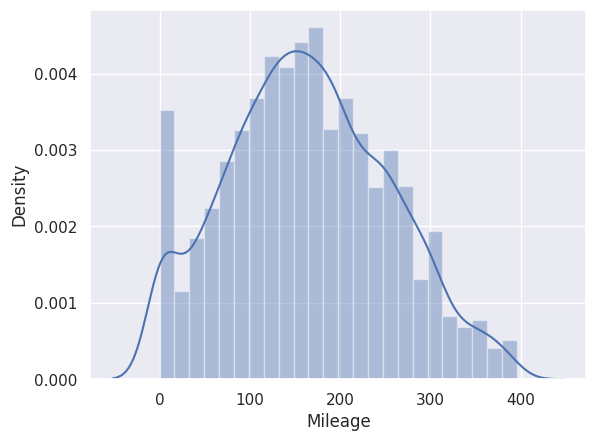

In [181]:
q = data_no_models.Mileage.quantile(0.98)
data_no_models = data_no_models[data_no_models.Mileage <q]
sns.distplot(data_no_models.Mileage)

<ipython-input-182-77425a723195>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_no_models.EngineV)


<Axes: xlabel='EngineV', ylabel='Density'>

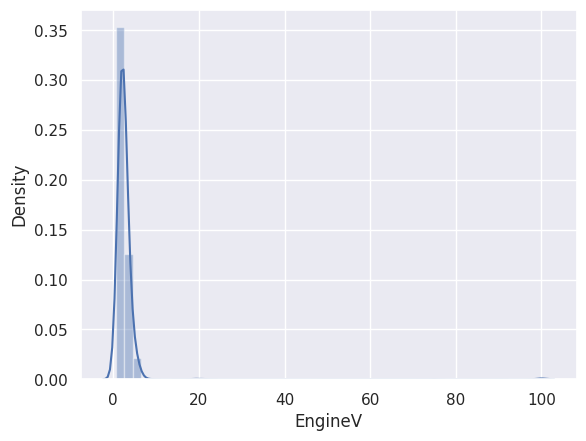

In [182]:
sns.distplot(data_no_models.EngineV)

<ipython-input-183-d982d232b646>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_no_models.EngineV)


<Axes: xlabel='EngineV', ylabel='Density'>

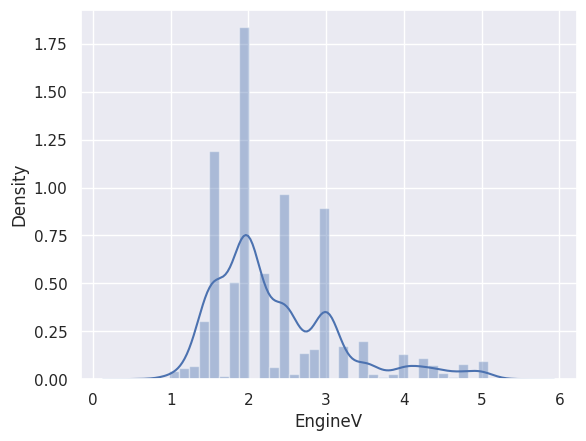

In [183]:
q = data_no_models.EngineV.quantile(0.98)
data_no_models = data_no_models[data_no_models.EngineV <q]
sns.distplot(data_no_models.EngineV)

<ipython-input-184-9cb2371912d4>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_no_models.Year)


<Axes: xlabel='Year', ylabel='Density'>

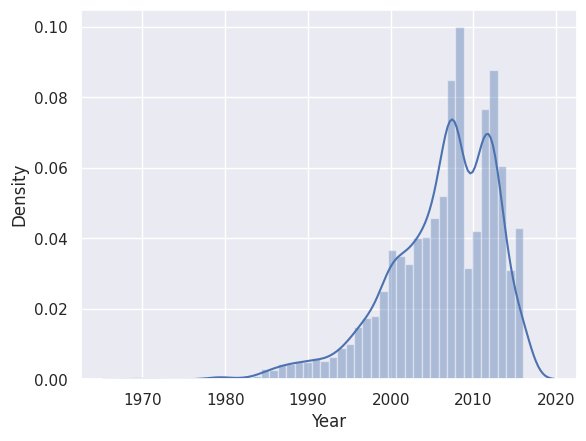

In [184]:
sns.distplot(data_no_models.Year)

<ipython-input-185-c3ac0fe57113>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_no_models.Year)


<Axes: xlabel='Year', ylabel='Density'>

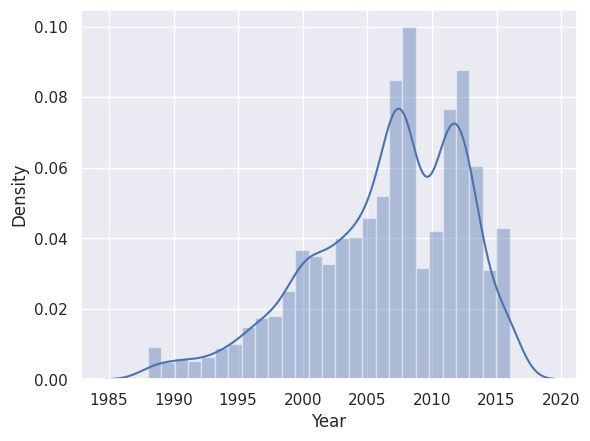

In [185]:
q = data_no_models.Year.quantile(0.01)
data_no_models = data_no_models[data_no_models.Year > q]
sns.distplot(data_no_models.Year)

In [186]:
data_prprocessed = data_no_models.copy()

In [187]:
data_prprocessed.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3594,3594.000000,3594,3594.000000,3594.000000,3594,3594,3594.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,833,NaN,1373,NaN,NaN,1671,3238,NaN
mean,NaN,14986.482279,NaN,164.494713,2.346013,NaN,NaN,2006.471619
std,NaN,11967.114705,NaN,89.644134,0.810871,NaN,NaN,5.909598
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7000.000000,NaN,100.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11000.000000,NaN,160.000000,2.000000,NaN,NaN,2007.000000
75%,NaN,18999.000000,NaN,230.000000,2.800000,NaN,NaN,2011.000000


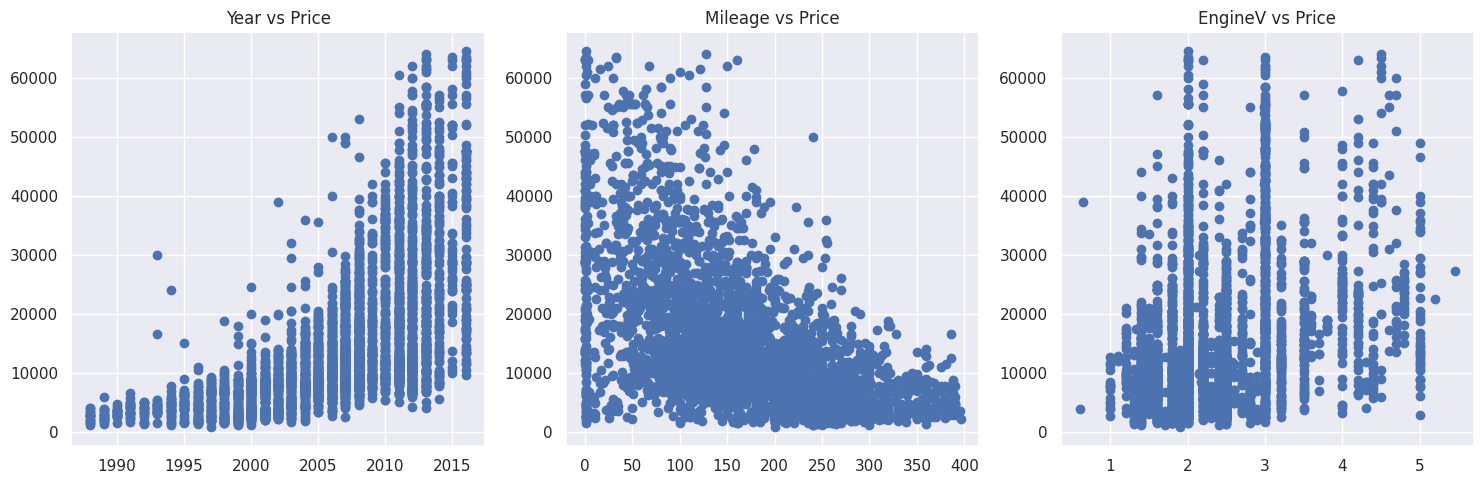

In [188]:
f , ax = plt.subplots(1,3, figsize = (15,5))
ax[0].scatter(data_prprocessed.Year, data_prprocessed.Price)
ax[0].set_title('Year vs Price')
ax[1].scatter(data_prprocessed.Mileage, data_prprocessed.Price)
ax[1].set_title('Mileage vs Price')
ax[2].scatter(data_prprocessed.EngineV, data_prprocessed.Price)
ax[2].set_title('EngineV vs Price')

plt.tight_layout()
plt.show()

In [189]:
data_prprocessed['Log_Price'] = np.log(data_prprocessed['Price'])

In [190]:
data_prprocessed.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Log_Price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,8.342840
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,9.814656
7,Audi,14200.0,vagon,200,2.7,Diesel,yes,2006,9.560997


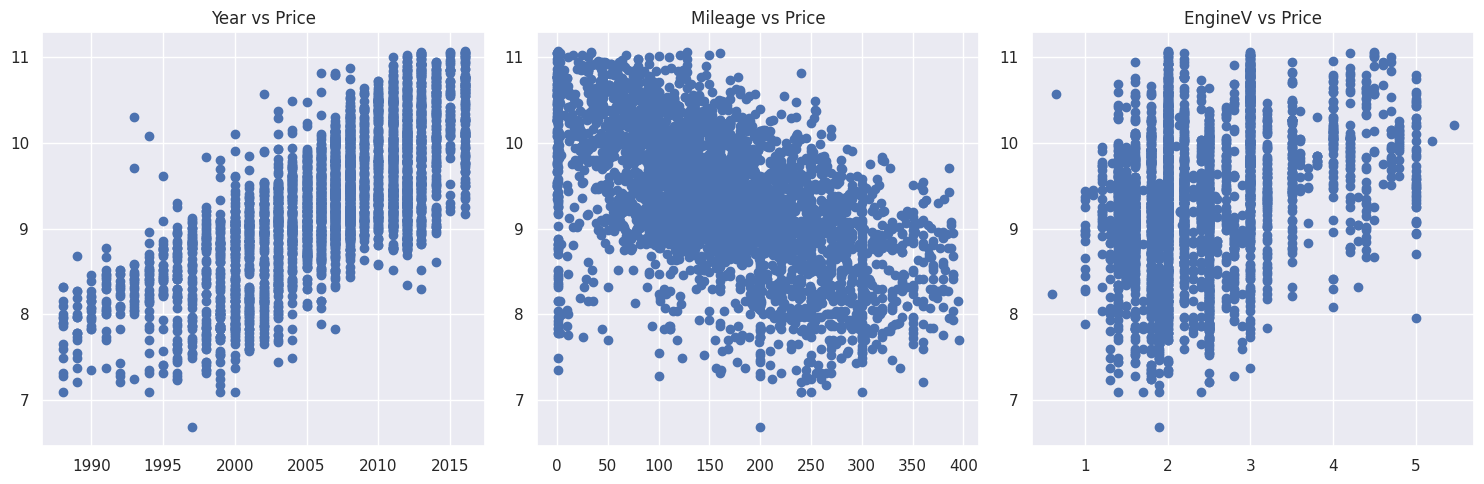

In [191]:
f , ax = plt.subplots(1,3, figsize = (15,5))
ax[0].scatter(data_prprocessed.Year, data_prprocessed.Log_Price)
ax[0].set_title('Year vs Price')
ax[1].scatter(data_prprocessed.Mileage, data_prprocessed.Log_Price)
ax[1].set_title('Mileage vs Price')
ax[2].scatter(data_prprocessed.EngineV, data_prprocessed.Log_Price)
ax[2].set_title('EngineV vs Price')

plt.tight_layout()
plt.show()

In [192]:
# checking the vif to see whether the atrriutes are multicollinearity or not
data_prprocessed.columns

Index(['Brand', 'Price', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'Log_Price'],
      dtype='object')

In [193]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variable = data_prprocessed[['Mileage','Year','EngineV']]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variable.values,i) for i in range(variable.shape[1])]
vif['Features'] = variable.columns
vif  #if vif is 1 then there is no collinearity its good , if it have <5 then its ok and above that should be removed i have removed above 10

,VIF,Features
0,4.410377,Mileage
1,11.499151,Year
2,9.513970,EngineV


In [194]:
data_prprocessed = data_prprocessed.drop('Year', axis = 1)

In [195]:
data_prprocessed.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Log_Price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,8.342840
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,9.814656
7,Audi,14200.0,vagon,200,2.7,Diesel,yes,9.560997


In [196]:
data_dummy_variables = data_prprocessed.copy()

In [197]:
data_dummy_variables.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Log_Price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,8.342840
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,9.814656
7,Audi,14200.0,vagon,200,2.7,Diesel,yes,9.560997


In [198]:
data_dummy_variables.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Log_Price
count,3594,3594.000000,3594,3594.000000,3594.000000,3594,3594,3594.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,833,NaN,1373,NaN,NaN,1671,3238,NaN
mean,NaN,14986.482279,NaN,164.494713,2.346013,NaN,NaN,9.324579
std,NaN,11967.114705,NaN,89.644134,0.810871,NaN,NaN,0.782660
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,6.684612
25%,NaN,7000.000000,NaN,100.000000,1.800000,NaN,NaN,8.853665
50%,NaN,11000.000000,NaN,160.000000,2.000000,NaN,NaN,9.305651
75%,NaN,18999.000000,NaN,230.000000,2.800000,NaN,NaN,9.852142


In [199]:
data_dummy_variables.dtypes

,0
Brand,object
Price,float64
Body,object
Mileage,int64
EngineV,float64
Engine Type,object
Registration,object
Log_Price,float64


In [200]:
data_dummy_variables = pd.get_dummies(data_dummy_variables, drop_first = True)
data_dummy_variables.astype(int).head()

,Price,Mileage,EngineV,Log_Price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,4200,277,2,8,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
2,13300,358,5,9,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,23000,240,4,10,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,18300,120,2,9,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
7,14200,200,2,9,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


In [205]:
target = data_dummy_variables.Log_Price
measures = data_dummy_variables.drop(['Log_Price','Price'] , axis = 1).astype(int)

In [206]:
measures

,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
2,358,5,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
7,200,2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4337,152,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1
4338,163,2,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
4339,35,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1
4341,1,3,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1


In [209]:
measures.dtypes

,0
Mileage,int64
EngineV,int64
Brand_BMW,int64
Brand_Mercedes-Benz,int64
Brand_Mitsubishi,int64
Brand_Renault,int64
Brand_Toyota,int64
Brand_Volkswagen,int64
Body_hatch,int64
Body_other,int64


In [207]:
target

,Log_Price
0,8.342840
2,9.495519
3,10.043249
4,9.814656
7,9.560997
...,...
4337,8.824678
4338,9.350102
4339,9.792556
4341,8.779557


In [210]:
target.dtypes

dtype('float64')

In [211]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(measures)

StandardScaler()

In [212]:
measures_scaled = scaler.transform(measures)

In [213]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(measures_scaled, target, test_size = 0.2, random_state = 365)

In [214]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [215]:
yhat = reg.predict(x_train)

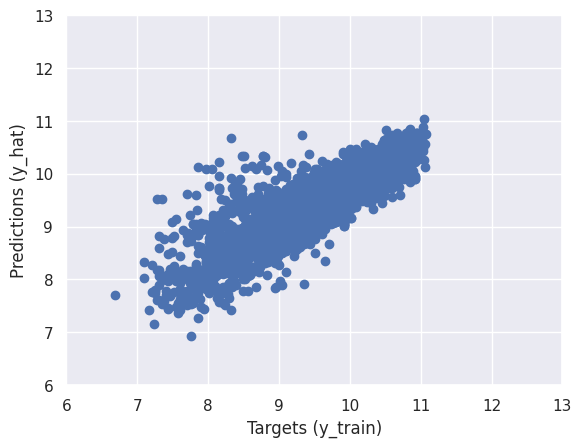

In [216]:
plt.scatter(y_train, yhat)
plt.xlabel('Targets (y_train)')
plt.ylabel('Predictions (y_hat)')
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

<ipython-input-217-3bae05836f45>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train - yhat)


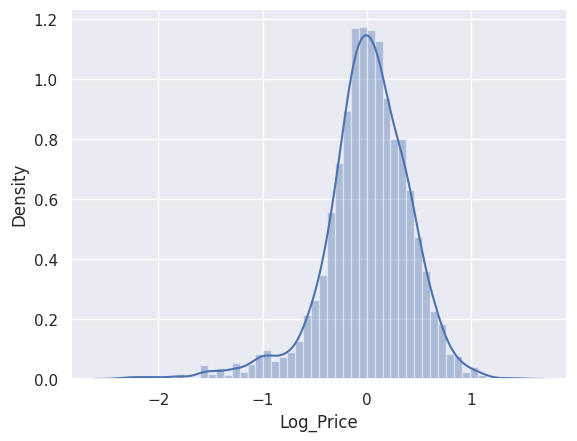

In [217]:
sns.distplot(y_train - yhat)
plt.show()

In [218]:
reg.score(x_train, y_train)

0.7091847188228351

In [219]:
reg.intercept_

9.324635747955643

In [220]:
reg.coef_

array([-0.38608747,  0.19103761,  0.00238111, -0.00653743, -0.13154466,
       -0.16812504, -0.04251849, -0.07570941, -0.1373687 , -0.08620194,
       -0.18006571, -0.11491644, -0.15293547, -0.1079346 , -0.02571504,
       -0.12403157,  0.31584296])

In [222]:
reg_summary = pd.DataFrame(measures.columns.values, columns = ['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,Mileage,-0.386087
1,EngineV,0.191038
2,Brand_BMW,0.002381
3,Brand_Mercedes-Benz,-0.006537
4,Brand_Mitsubishi,-0.131545
5,Brand_Renault,-0.168125
6,Brand_Toyota,-0.042518
7,Brand_Volkswagen,-0.075709
8,Body_hatch,-0.137369
9,Body_other,-0.086202


(6.0, 13.0)

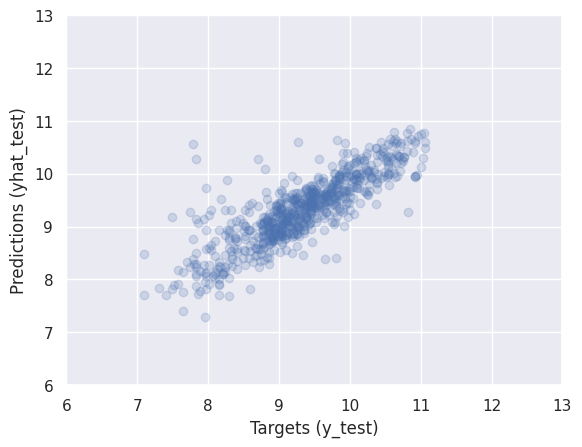

In [223]:
#Testing
yhat_test = reg.predict(x_test)
plt.scatter(y_test, yhat_test, alpha = 0.2)
plt.xlabel('Targets (y_test)')
plt.ylabel('Predictions (yhat_test)')
plt.xlim(6,13)
plt.ylim(6,13)

In [224]:
df_pf = pd.DataFrame(yhat_test, columns = ['Predictions'])
df_pf.head()

,Predictions
0,10.031974
1,9.266881
2,9.410839
3,9.061264
4,9.292011


In [225]:
df_pf = pd.DataFrame(np.exp(yhat_test), columns = ['Predictions']) #converting to original price
df_pf.head()

,Predictions
0,22742.123055
1,10581.694351
2,12220.123680
3,8615.030899
4,10850.983087


In [226]:
df_pf['Target'] = pd.DataFrame(np.exp(y_test))
df_pf.head()

,Predictions,Target
0,22742.123055,NaN
1,10581.694351,NaN
2,12220.123680,NaN
3,8615.030899,NaN
4,10850.983087,NaN


In [227]:
y_test = y_test.reset_index(drop = True)
y_test.head()

,Log_Price
0,9.887972
1,9.778491
2,9.581904
3,9.071078
4,9.210240


In [228]:
df_pf['Target'] = pd.DataFrame(np.exp(y_test))
df_pf.head()

,Predictions,Target
0,22742.123055,19692.08
1,10581.694351,17650.00
2,12220.123680,14500.00
3,8615.030899,8700.00
4,10850.983087,9999.00


In [229]:
df_pf['Residuals'] = df_pf['Target'] - df_pf['Predictions']
df_pf.head()

,Predictions,Target,Residuals
0,22742.123055,19692.08,-3050.043055
1,10581.694351,17650.00,7068.305649
2,12220.123680,14500.00,2279.876320
3,8615.030899,8700.00,84.969101
4,10850.983087,9999.00,-851.983087


In [230]:
df_pf['Difference'] = np.abs((df_pf['Residuals']/df_pf['Target'])*100)
df_pf.head()

,Predictions,Target,Residuals,Difference
0,22742.123055,19692.08,-3050.043055,15.488679
1,10581.694351,17650.00,7068.305649,40.047058
2,12220.123680,14500.00,2279.876320,15.723285
3,8615.030899,8700.00,84.969101,0.976656
4,10850.983087,9999.00,-851.983087,8.520683


In [231]:
df_pf.describe()

,Predictions,Target,Residuals,Difference
count,719.000000,719.000000,719.000000,719.000000
mean,13694.718702,14936.777789,1242.059086,36.498175
std,9053.355663,12084.840641,6917.248830,82.955821
min,1457.858516,1199.000000,-36269.298632,0.036072
25%,7524.526500,7000.000000,-1961.443527,9.902923
50%,11306.937778,10900.000000,279.981680,21.184469
75%,16873.463769,18788.500000,2807.886763,37.846024
max,51399.626725,64000.000000,39250.240704,1511.220776


In [236]:
pd.options.display.max_rows = 999
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_pf.sort_values(by = 'Difference')

,Predictions,Target,Residuals,Difference
499,11504.15,11500.00,-4.15,0.04
697,13005.05,13000.00,-5.05,0.04
679,13192.24,13200.00,7.76,0.06
215,8694.76,8700.00,5.24,0.06
57,3302.58,3300.00,-2.58,0.08
467,12513.26,12500.00,-13.26,0.11
70,51399.63,51500.00,100.37,0.19
678,7916.68,7900.00,-16.68,0.21
300,8221.26,8200.00,-21.26,0.26
381,3786.47,3800.00,13.53,0.36
